In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Pre-Processing 

In [5]:
# 1. Missing data. 

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# 2. Outliers

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# 3. Encoding

# Only df['State'] needs encoding. WIll be done after EDA.  

In [8]:
# 4. No need of imbalance check.

# 5. Scaling is required. But will be done -- after EDA.

# EDA

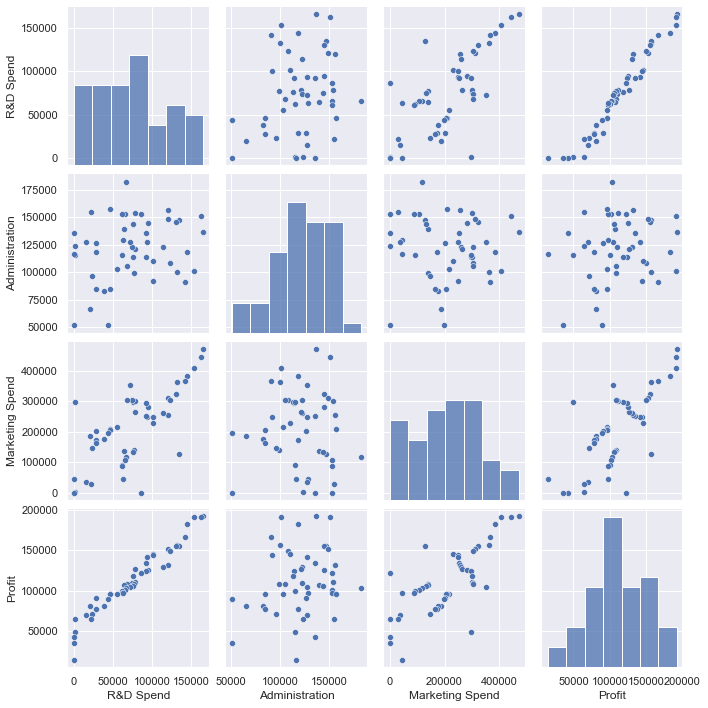

In [9]:
sns.pairplot(df)

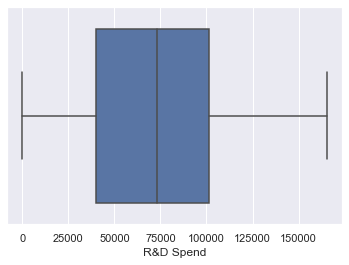

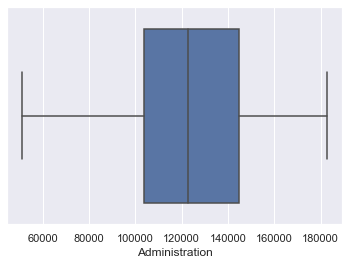

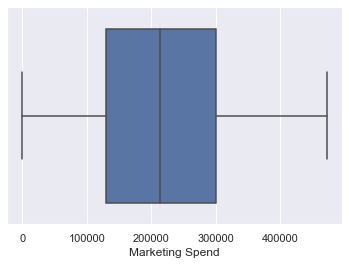

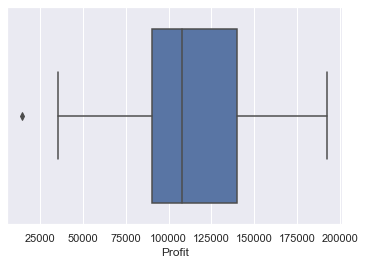

In [10]:
def box(i):
    sns.boxplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude = 'object').columns:
    box(i)

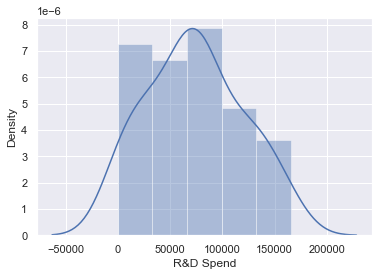

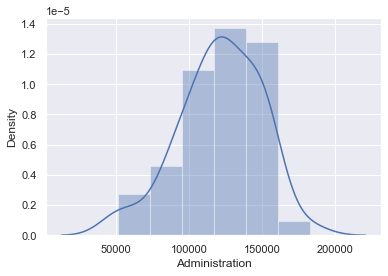

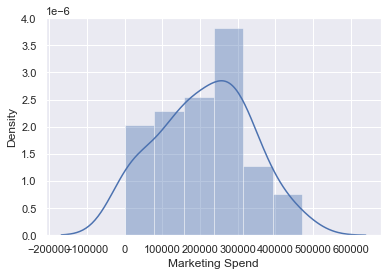

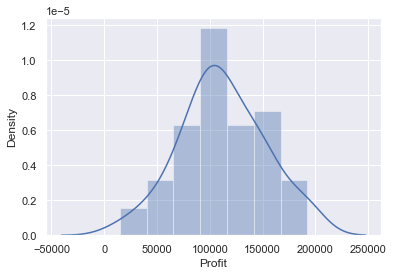

In [11]:
def dist(i):
    sns.distplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude = 'object').columns:
    dist(i)

<AxesSubplot:>

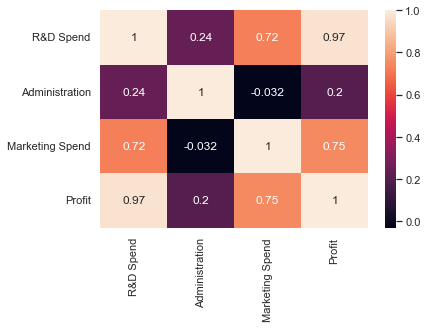

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report.to_file("50_Startups.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Observations from EDA - 


1. Pair plot shows linear relation with each other. 
2. All the features are normally distributed. 
3. Correlation between R&D and Profit is seen...one is IDV and other is DV. So no treatment is done. 

In [41]:
# Encoding

df = pd.get_dummies(df,columns=['State'],drop_first=True)
df.head(1)

KeyError: "None of [Index(['State'], dtype='object')] are in the [columns]"

In [ ]:
# Spliting into IDV DV:

x=df.drop(['Profit'],axis=1)
y=df['Profit']

In [ ]:
x

In [ ]:
y

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x

In [ ]:
# Spliting data into training and testing datasets. 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#  BUILDING MODEL 

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,y_pred)

0.9347068473282423

In [46]:
# Model Accuracy is very good. 
# We will use OLS model to further check the accuracy of the model. 

# OLS 

In [47]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [26]:
ols = smf.OLS(endog=y_train, exog=x_train).fit()

In [27]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.121
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.9671
Date:                Wed, 17 May 2023   Prob (F-statistic):                       0.451
Time:                        20:39:34   Log-Likelihood:                         -520.86
No. Observations:                  40   AIC:                                      1052.
Df Residuals:                      35   BIC:                                      1060.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           2.68e+04   2.99e+04      0.897      0.376   -3.39e+04    8.75e+04
x2          1.394e+04   2.19e+04      0.637      0.529   -3.05e+04    5.84e+04
x3          5139.0815   2.81e+04      0.183      0.856   -5.19e+04    6.21e+04
x4         -2.181e+04   2.22e+04     -0.983      0.333   -6.69e+04    2.32e+04
x5         -4281.9407   2.07e+04     -0.207      0.837   -4.63e+04    3.77e+04
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.188
Skew:                           0.041   Prob(JB):                        0.910
Kurtosis:                       2.674   Cond. No.                         2.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OBSERVATION - OLD MODEL

1. Linearity :: All the data is linearly related as seen in the pair plot.

2. Homoscadasicity - The actual-predicted should be constant or same.

3. Autocorrelation: 
DUrbin Watson value is very low and we can say that the data has negative autocorrelation. 
We should check the p-value and if that value is not great ..then we should think of changing the model. 

4. Correlation:
No major observation for correlation.

5. p-value --
In the OLS method, all the variables are looking more than 0.05 ...no variable seem to be going well in this model.

6. Endoginty -
DV used is right. We are predicting the profit. 

7. Normality
Q-Q plots seem to be plotted nicely. 

8. R-Squared Error -
Is not good at all. 

OLS technique should not be used. 

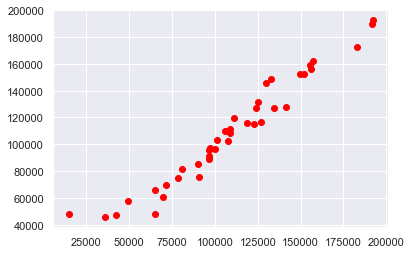

In [31]:
plt.scatter(y_train,lr.predict(x_train),color='red')

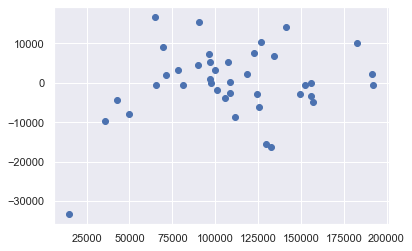

In [34]:
plt.scatter(y_train,(y_train-lr.predict(x_train)))

# Regularization for LInear Model

In [36]:
from sklearn.linear_model import Ridge, Lasso

In [37]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)
y_pred_r = ridge.predict(x_test)
r2_score(y_test,y_pred_r)

0.9345879357660576

In [38]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred_l = lasso.predict(x_test)
r2_score(y_test,y_pred_l)

0.9347072591135379

This is good..that means even after adding the optimization parameter, the accuracy of the linear regression is not moved. 
Linear regression model is good. 

# Evaluation Parameters

In [39]:
from sklearn import metrics

In [50]:
print("Mean Squared Error - ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error - ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute Error - ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean absolute Percentage Error - ",metrics.mean_absolute_error(y_test,y_pred)*100)

Mean Squared Error -  83502864.03257757
Root Mean Squared Error -  9137.990152794955
Mean absolute Error -  7514.293659640612
Mean absolute Percentage Error -  751429.3659640611


This parameter doesn't look fine. 

# DONE